In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import os

In [2]:
import cv2
import imghdr

C:\Users\aliel\AppData\Local\Temp\ipykernel_25700\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = 'Skin_diesiese'

In [4]:
image_exts = ['jpeg', 'jpg', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): 
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            x = imghdr.what(image_path) 
            if x not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('Skin_diesiese')

Found 426 files belonging to 7 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

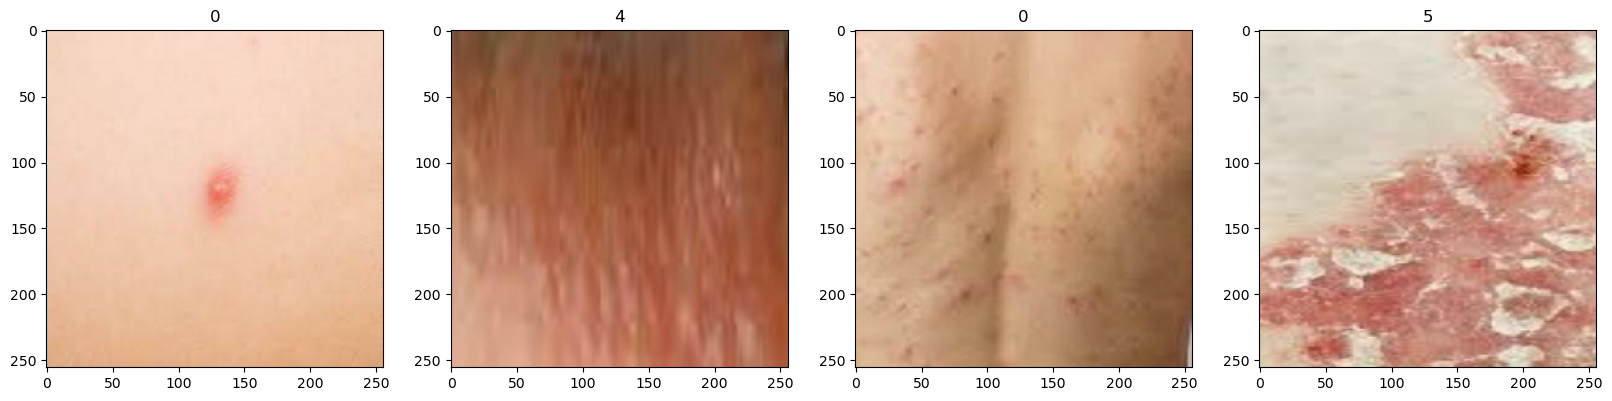

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) 
for idx, img in enumerate(batch[0][:4]): 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.57588845, 0.46608457, 0.3719669 ],
          [0.57588845, 0.46608457, 0.3719669 ],
          [0.57593024, 0.46612632, 0.37200868],
          ...,
          [0.54509807, 0.4745098 , 0.38039216],
          [0.54509807, 0.4745098 , 0.38039216],
          [0.54509807, 0.4745098 , 0.38039216]],
 
         [[0.55816483, 0.44836092, 0.35424325],
          [0.55841464, 0.44861072, 0.35449308],
          [0.5598527 , 0.45004877, 0.35593113],
          ...,
          [0.5455346 , 0.47494638, 0.38082874],
          [0.5455346 , 0.47494638, 0.38082874],
          [0.5455346 , 0.47494638, 0.38082874]],
 
         [[0.53507197, 0.42526808, 0.33115044],
          [0.5373162 , 0.42751226, 0.33339462],
          [0.5414543 , 0.43165037, 0.33753273],
          ...,
          [0.54901963, 0.47843137, 0.38431373],
          [0.54901963, 0.47843137, 0.38431373],
          [0.54901963, 0.47843137, 0.38431373]],
 
         ...,
 
         [[0.6114813 , 0.53624386, 0.4207797 ],
          [0.61064

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) 
test_size = int(len(data)*.1) 

In [14]:
train_size, val_size, test_size

(9, 2, 1)

In [15]:
train = data.take(train_size) 
val = data.skip(train_size).take(val_size) 
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

In [17]:
model = Sequential()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(7, activation='softmax'))  # 7 output classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


C:\Users\aliel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,497,191 (120.15 MB)

 Trainable params: 31,497,191 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
logdir='logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = model.fit(train, epochs=31, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 677ms/step - accuracy: 0.1646 - loss: 15.0990 - val_accuracy: 0.0781 - val_loss: 3.8967
Epoch 2/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 636ms/step - accuracy: 0.1488 - loss: 2.8567 - val_accuracy: 0.2344 - val_loss: 1.9037
Epoch 3/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 633ms/step - accuracy: 0.2144 - loss: 1.9175 - val_accuracy: 0.4219 - val_loss: 1.6767
Epoch 4/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.3574 - loss: 1.6841 - val_accuracy: 0.3125 - val_loss: 1.6144
Epoch 5/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step - accuracy: 0.3839 - loss: 1.5262 - val_accuracy: 0.5469 - val_loss: 1.2129
Epoch 6/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.5261 - loss: 1.3667 - val_accuracy: 0.6250 - val_loss: 1.1543
Epoch 7/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.5671 - loss: 1.1776 - val_accuracy: 0.5156 - val_loss: 1.4000
Epoch 8/31
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 626ms/step - accuracy: 0.5962 - loss: 1.0898 - val_accuracy: 0.5781 - val_loss

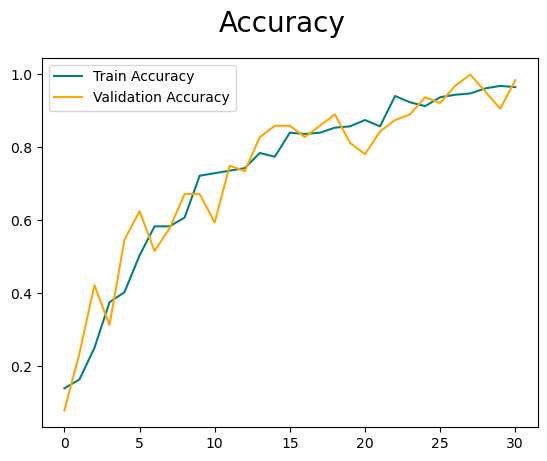

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

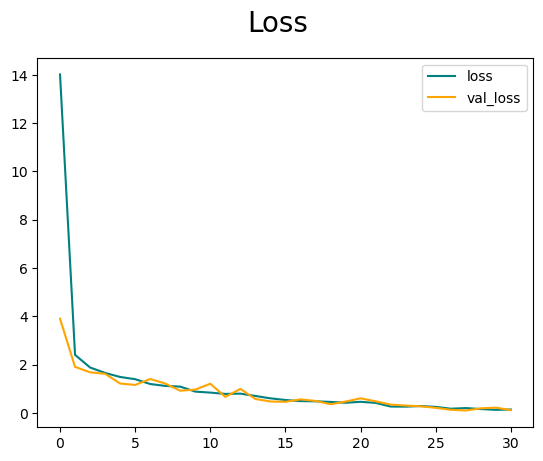

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall() 
acc = BinaryAccuracy() 

In [27]:
X, y = batch  # X is (32, 256, 256, 3), y is (32,)
yhat = model.predict(X)  # yhat is (32, 7)

yhat_labels = tf.argmax(yhat, axis=1)  # Convert softmax to class index
y = tf.squeeze(y)

pre.update_state(y, yhat_labels)
re.update_state(y, yhat_labels)
acc.update_state(y, yhat_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [28]:
print(yhat.shape)

(32, 7)


In [58]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.40625, shape=(), dtype=float32)


In [62]:
model.export("skin_disease_model")
converter = tf.lite.TFLiteConverter.from_saved_model("skin_disease_model")
tflite_model = converter.convert()

with open("skin_disease_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: skin_disease_model\assets


INFO:tensorflow:Assets written to: skin_disease_model\assets


Saved artifact at 'skin_disease_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2287270374160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270374928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270375120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270375888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270376656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270378384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270378000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2287270379152: TensorSpec(shape=(), dtype=tf.resource, name=None)


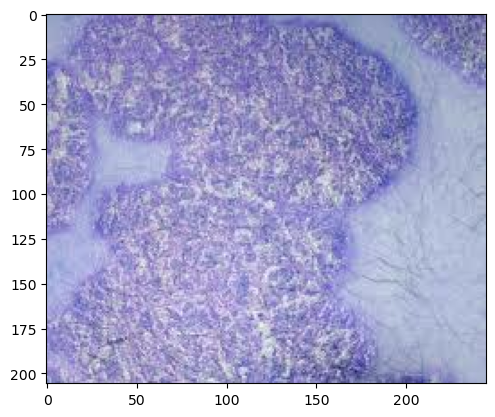

In [68]:
img = cv2.imread('Sample.jpg')
plt.imshow(img)
plt.show()

In [70]:

# Load your TFLite model
interpreter = tf.lite.Interpreter(model_path="skin_disease_model.tflite")
interpreter.allocate_tensors()

# Prepare the image
img = cv2.imread("Sample.jpg")
img = cv2.resize(img, (256, 256))
img = img / 255.0
img = img.astype(np.float32)
img = np.expand_dims(img, axis=0)  # (1, 256, 256, 3)

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the tensor
interpreter.set_tensor(input_details[0]['index'], img)

# Run inference
interpreter.invoke()

class_names = ['Eczema', 'Melanoma', 'Acne', 'Rosacea', 'Psoriasis', 'Vitiligo', 'Wart']

# Get prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)
print("Predicted class:", class_names[predicted_class])


Predicted class: Vitiligo
